## Introduction to Data Science  

### Machine Learning Explainability
Based in [this](https://medium.com/data-science-community-srm/machine-learning-visualizations-with-yellowbrick-3c533955b1b3) and [this](https://towardsdatascience.com/explainable-ai-xai-a-guide-to-7-packages-in-python-to-explain-your-models-932967f0634b) articles

A) [Yellow Brick](https://www.scikit-yb.org/en/latest/)  
B) [SHAP](https://github.com/slundberg/shap)  
C) [LIME](https://github.com/marcotcr/lime)  
D) [SHAPASH](https://shapash.readthedocs.io/en/latest/)  
E) [ExplainerDashboard](https://explainerdashboard.readthedocs.io/en/latest/index.html)  
F) [Dalex](https://github.com/ModelOriented/DALEX)  
G) [Explainable Boosting Machines (EBM)](https://interpret.ml/)  
H) [ELI5](https://eli5.readthedocs.io/en/latest/index.html)  

----------------------------------------------

#### A) [Yellow Brick](https://www.scikit-yb.org/en/latest/) Visualiser

+ Feature Analysis Visualizers
+ Target Visualizers
+ Regression Visualizers
+ Classification Visualizers
+ Clustering Visualizers
+ Model Selection Visualizers
+ Text Visualizers

In [1]:
!pip install -U yellowbrick

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 4.9 MB/s eta 0:00:005.2 MB/s eta 0:00:01


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.rcParams['figure.figsize'] = [16, 16]
#plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

1. Feature Analysis Visualizers

Feature analysis visualizers are used to detect features or targets that might impact downstream fitting. Here, we’ll use the Rank1D and Rank2D features to evaluate single features and pairs of features using a variety of metrics that score the features on the scale [-1, 1] or [0, 1].

A one-dimensional ranking of features [Rank1D] utilizes a ranking algorithm that takes into account only a single feature at a time

/home/renato/Documents/env_default/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


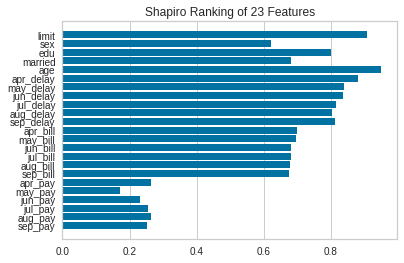

<AxesSubplot:title={'center':'Shapiro Ranking of 23 Features'}>

In [3]:
from yellowbrick.datasets import load_credit
from yellowbrick.features import Rank1D

# Load the credit dataset
X, y = load_credit()

# Instantiate the 1D visualizer with the Shapiro ranking algorithm
visualizer = Rank1D(algorithm='shapiro')

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Finalize and render the figure# Note: I have used the yellowbrick's pre-loaded datasets to implement all the visualizers.

A two-dimensional ranking of features [Rank 2D] utilizes a ranking algorithm that takes into account pairs of features at a time

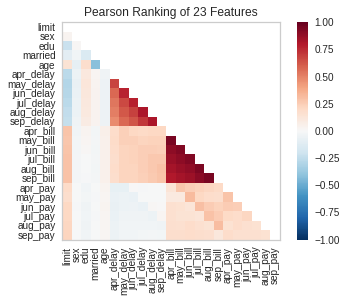

<AxesSubplot:title={'center':'Pearson Ranking of 23 Features'}>

In [4]:
from yellowbrick.datasets import load_credit
from yellowbrick.features import Rank2D

# Load the credit dataset
X, y = load_credit()

# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(algorithm='pearson')

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Finalize and render the figure

2. Target Visualizers

These visualizers specialize in visually describing the dependent variable for supervised modeling, often referred to as y or the target. Here, we’ll look at the Class balance visualizer. Imbalance of classes in the training data is one of the biggest challenges for Classification models and before we start dealing with it, it is important to understand what the class balance is in the training data.

The ClassBalance visualizer supports this by creating a bar chart of the support for each class, which is the frequency of the classes’ representation in the dataset.

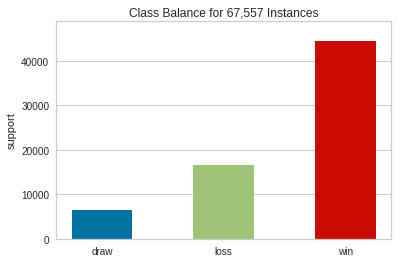

<AxesSubplot:title={'center':'Class Balance for 67,557 Instances'}, ylabel='support'>

In [5]:
from yellowbrick.datasets import load_game
from yellowbrick.target import ClassBalance

# Load the classification dataset
X, y = load_game()

# Instantiate the visualizer
visualizer = ClassBalance(labels=["draw", "loss", "win"])

visualizer.fit(y)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

3. Regression Visualizer

Regression models attempt to predict a target in a continuous space. Regressor score visualizers display the instances in model space to help us better understand how the model is making predictions. In this blog, we’ll look at the Prediction Error Plot which plots the expected vs. actual values in model space.

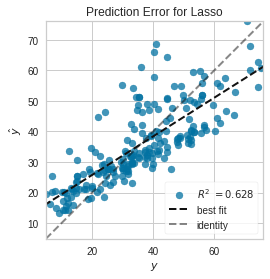

<AxesSubplot:title={'center':'Prediction Error for Lasso'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError

# Load a regression dataset
X, y = load_concrete()

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
model = Lasso()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)         # Fit the training data 
visualizer.score(X_test, y_test)         # Evaluate the model 
visualizer.show()                        # Render the figure

4. Classification Visualizer

Classification models attempt to predict a target in a discrete space, that is assigned an instance of dependent variables one or more categories. The Classification score visualizers display the differences between classes as well as a number of classifier-specific visual evaluations.

We’ll look at the Confusion Matrix Visualizer with the quick method confusion_matrix, it will build the ConfusionMatrix object with the associated arguments, fit it, and then we can render it.

/home/renato/Documents/env_default/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


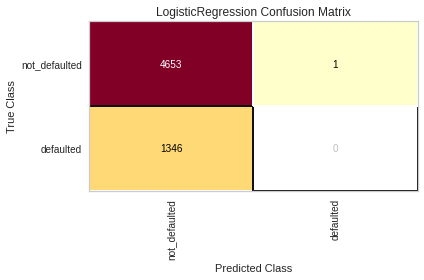

<Figure size 432x288 with 0 Axes>

In [7]:
from yellowbrick.datasets import load_credit
from yellowbrick.classifier import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts

#Load the classification dataset
X, y = load_credit()

#Create the train and test data
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)

# Instantiate the visualizer with the classification model
confusion_matrix(
    LogisticRegression(),
    X_train, y_train, X_test, y_test,
    classes=['not_defaulted', 'defaulted']
)
plt.tight_layout()

5. Clustering Visualizer

Clustering models are unsupervised methods that attempt to detect patterns in unlabeled data. Yellowbrick provides the yellowbrick.cluster module to visualize and evaluate clustering behavior.

The KElbowVisualizer helps us select the optimal number of clusters by fitting the model with a range of values for ‘k’. If the line chart resembles an arm, then the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point. In this visualizer, “elbow” will be annotated with a dashed line.

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f590c4fe280>
Traceback (most recent call last):
  File "/home/renato/Documents/env_default/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/renato/Documents/env_default/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/renato/Documents/env_default/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/renato/Documents/env_default/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo

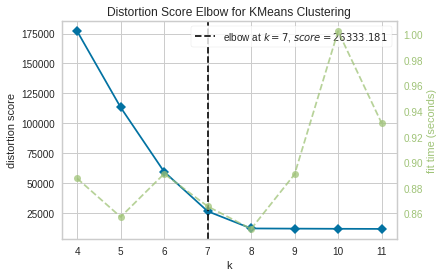

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

6. Model Selection Visualizer:

The yellowbrick.model_selection package provides us with visualizers for inspecting the performance of cross-validation and hyperparameter tuning. Many visualizers wrap functionality found in sklearn.model_selection and others build upon it for performing multi-model comparisons.

Model validation is used to determine how effective an estimator is on data that it has been trained on as well as how generalizable it is to new input. To measure a model’s performance we first split the dataset into training and test splits, fitting the model on the training data and scoring it on the reserved test data. the hyperparameters of the model must be selected which best allows the model to operate in the specified feature space to maximize its score.

In my example, we’ll explore using the ValidationCurve visualizer with a regression dataset.

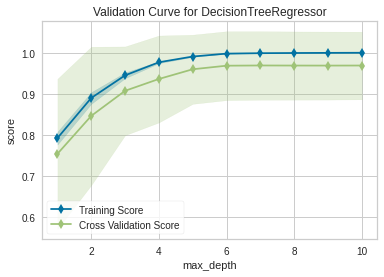

<AxesSubplot:title={'center':'Validation Curve for DecisionTreeRegressor'}, xlabel='max_depth', ylabel='score'>

In [9]:
import numpy as np

from yellowbrick.datasets import load_energy
from yellowbrick.model_selection import ValidationCurve

from sklearn.tree import DecisionTreeRegressor

# Load a regression dataset
X, y = load_energy()

viz = ValidationCurve(
    DecisionTreeRegressor(), param_name="max_depth",
    param_range=np.arange(1, 11), cv=10, scoring="r2"
)

# Fit and show the visualizer
viz.fit(X, y)
viz.show()

7. Text Modelling Visualizer:

The last visualizer that we’ll check out in this blog is from the yellowbrick.text module for text-specific visualizers. The TextVisualizer class specifically deals with datasets that are corpora and not simple numeric arrays or DataFrames, providing utilities for analyzing word dispersion and distribution, showing document similarity, or simply wrapping some of the other standard visualizers with text-specific display properties. Here, we’ll check out the FrequencyVisualizer for Token Frequency Distribution.

/home/renato/Documents/env_default/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


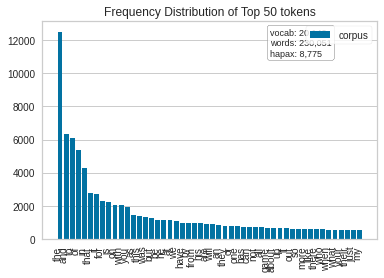

<AxesSubplot:title={'center':'Frequency Distribution of Top 50 tokens'}>

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

from yellowbrick.text import FreqDistVisualizer
from yellowbrick.datasets import load_hobbies

# Load the text data
corpus = load_hobbies()

vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(corpus.data)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

#### B) [SHAP](https://github.com/slundberg/shap)

One of the most popular methods today, SHAP (SHapley Additive exPlanations) is a game theory based approach to explain the output of any ML model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions.

SHAP is a model agnostic framework. More details on the methodology can be found on their page and in papers such as [this one by Lundberg and Lee](https://papers.nips.cc/paper/2017/file/8a20a8621978632d76c43dfd28b67767-Paper.pdf). Another good article to understand the math with an example oriented explanation by Ula La Paris can be read [here](https://towardsdatascience.com/shap-explained-the-way-i-wish-someone-explained-it-to-me-ab81cc69ef30). This package which is now easily one of the most popular choices has evolved over the last few years with intuitive and engaging visualizations across various aspects of model explainability. Some visualizations are given below followed by the code to generate these.

In [11]:
# ! pip install -U -q xgboost shap

![](https://raw.githubusercontent.com/slundberg/shap/master/docs/artwork/shap_header.svg)

We are going to use the Breast Cancer dataset as an example to depict some of the outputs from various packages. In this dataset, features are computed from a digitized image of a Fine Needle Aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. The task is a binary classification to predict.

In [12]:
# import the dataset from Sklearn
from sklearn.datasets import load_breast_cancer

# Read the DataFrame, first using the feature data
data = load_breast_cancer() 
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add a target column, and fill it with the target data
df['target'] = data.target

# Show the first five rows
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [13]:
# Set up the data for modelling 
import xgboost as xgb
from sklearn.metrics import accuracy_score

y = df['target'].to_frame() # define Y
X = df[df.columns.difference(['target'])] # define X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) # create train and test

# build model - Xgboost
xgb_mod = xgb.XGBClassifier(random_state=42,gpu_id=0) # build classifier
xgb_mod = xgb_mod.fit(X_train,y_train.values.ravel()) 

# make prediction and check model accuracy 
y_pred = xgb_mod.predict(X_test)

# Performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
import shap

# Generate the Tree explainer and SHAP values
explainer = shap.TreeExplainer(xgb_mod)
shap_values = explainer.shap_values(X)
expected_value = explainer.expected_value

############## visualizations #############
# Generate summary dot plot
shap.summary_plot(shap_values, X,title="SHAP summary plot") 

# Generate summary bar plot 
shap.summary_plot(shap_values, X,plot_type="bar") 

# Generate waterfall plot  
shap.plots._waterfall.waterfall_legacy(expected_value, shap_values[79], features=X.loc[79,:], feature_names=X.columns, max_display=15, show=True)

# Generate dependence plot
shap.dependence_plot("worst concave points", shap_values, X, interaction_index="mean concave points")

# Generate multiple dependence plots
for name in X_train.columns:
     shap.dependence_plot(name, shap_values, X)
shap.dependence_plot("worst concave points", shap_values, X, interaction_index="mean concave points")

# Generate force plot - Multiple rows 
shap.force_plot(explainer.expected_value, shap_values[:100,:], X.iloc[:100,:])

# Generate force plot - Single
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

# Generate Decision plot 
shap.decision_plot(expected_value, shap_values[79],link='logit' ,features=X.loc[79,:], feature_names=(X.columns.tolist()),show=True,title="Decision Plot")

#### C) [LIME](https://github.com/marcotcr/lime)

[Lime](https://towardsdatascience.com/explaining-machine-learning-classifiers-with-lime-def5adaacfea) was one of the first techniques to gain some popularity in the explainability domain. Lime stands for Local interpretable model agnostic explanations. The methodology behind Lime is covered in this paper. Currently, Lime helps explain predictions for tabular data, images and text classifiers.

Lime basically tries to give a local linear approximation of the model’s behaviour by creating local surrogate models which are trained to mimic the ML model’s predictions locally. While global importance shows an average effect across the whole data set, a local-level observation may be influenced in different ways from each variable. This surrogate model could be anything from GLMs to decision trees which try and understand how local importance may differ. The general framework as mentioned in [interpretable-ml-book by Christoph Molnar](https://christophm.github.io/interpretable-ml-book/lime.html) is:

+ Select your instance of interest for which you would like to have an explanation of its black box prediction
+ Perturb your dataset and get the black box predictions for these new points
+ Weight the new samples according to their proximity to the instance of interest
+ Train a weighted, interpretable model on the dataset with the variations
+ Explain the prediction by interpreting the local model

But there are certain limitations to Lime and it [should be used with caution](https://towardsdatascience.com/whats-wrong-with-lime-86b335f34612). Interesting experimentation and further references are given in this article for individuals who want to deep-dive into Lime.

In [ ]:
#!pip install -U lime

In [ ]:
# Utilizing our same xgb_mod model object created above

import lime
import lime.lime_tabular
import numpy as np
import xgboost

############## create explainer ###########

# we use the dataframes splits created above for SHAP
explainer = lime.lime_tabular.LimeTabularExplainer(X_test.to_numpy(), 
                                                   feature_names=X_test.columns, 
                                                   class_names=['0','1'], 
                                                   verbose=True)

############## visualizations #############

exp = explainer.explain_instance(X_test.to_numpy()[79], xgb_mod.predict_proba, num_features=20)
exp.show_in_notebook(show_table=True)

#### D) [SHAPASH](https://shapash.readthedocs.io/en/latest/)  

Interactivity and engaging visuals are key to convey data stories, insights and model results. Compiling these into a notebook or a web app represents the ideal way forward on how business and data scientists/analysts should present and interact with AI/ML outcomes. Shapash takes a step in that direction. It is a Python library built by data scientists of a French insurer, MAIF. This package compiles various visualizations around SHAP/Lime explainability and publishes an easy to use interactive dashboard as a web app.

It uses Shap or Lime backend to compute contributions. Shapash relies on the different steps necessary to build a ML model to make the results understandable.  

It works for regression, binary classification or multiclass problems and is compatible with many models: Catboost, Xgboost, LightGBM, Sklearn Ensemble, Linear models and SVM.  

Some visualizations on our dataset and relevant code is shared below. We continue to use our Xgboost model as an example which is compatible with this package.  

In [ ]:
# !pip install -U shapash category_encoders datatable

In [ ]:
# Utilizing our same xgb_mod model object created above

# import packages
import pandas as pd
import numpy as np
import time 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from category_encoders import OrdinalEncoder
from sklearn.model_selection import train_test_split
import shapash
import shap
import datatable as dt # data table factory
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from shapash.utils.load_smartpredictor import load_smartpredictor
from shapash.explainer.smart_explainer import SmartExplainer

############## launch the app #############
# create explainer
xpl = SmartExplainer()
xpl.compile(x=X_test,
            model=xgb_mod)

#Creating Application
app = xpl.run_app(title_story='Breast Cancer')

############## visualizations #############
# feature importance based on SHAP
xpl.plot.features_importance()

# contributions plot
xpl.plot.contribution_plot("worst concave points")

# Local explanation
xpl.plot.local_plot(index=79)

# compare plot 
xpl.plot.compare_plot(index=[X_test.index[79], X_test.index[80]])

# Interactive interactions widget 
xpl.plot.top_interactions_plot(nb_top_interactions=5)

# save contributions
predictor = xpl.to_smartpredictor()
predictor.add_input(x=X_train, ypred=y_train)
detailed_contributions = predictor.detail_contributions()

#### E) [ExplainerDashboard](https://explainerdashboard.readthedocs.io/en/latest/index.html)  

#### F) [Dalex](https://github.com/ModelOriented/DALEX)  

#### G) [Explainable Boosting Machines (EBM)](https://interpret.ml/)  

#### H) [ELI5](https://eli5.readthedocs.io/en/latest/index.html)  